In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("portuguese")
plt.style.use('fivethirtyeight')
data = pd.read_csv(r"clean-boatos.org-2022-12-19.csv", encoding="utf-8")
data['Length'] = data['title'].apply(len)
data.groupby('Length').describe().head(20)

Unnamed: 0                                                             \
            count         mean         std     min      25%     50%      75%   
Length                                                                         
35            2.0   729.500000    0.707107   729.0   729.25   729.5   729.75   
38            2.0   389.500000    0.707107   389.0   389.25   389.5   389.75   
41            2.0   569.500000    0.707107   569.0   569.25   569.5   569.75   
42            1.0   140.000000         NaN   140.0   140.00   140.0   140.00   
46            1.0  1186.000000         NaN  1186.0  1186.00  1186.0  1186.00   
47            8.0   876.875000  424.771682   117.0   545.00  1163.0  1168.25   
48            5.0   746.200000  409.796535   404.0   405.00   540.0  1190.00   
49            1.0   585.000000         NaN   585.0   585.00   585.0   585.00   
50            5.0   611.600000  370.955253   302.0   303.00   509.0   761.00   
51            6.0   463.666667  261.417418   269.0   270.25   326.0   667.50   
52            6.0   649.000000  462.157116   179.0   245.75   580.0  1065.75   
53            6.0   259.500000  123.221346   188.0   189.25   190.5   278.00   
54            4.0   807.250000  290.426554   408.0   684.00   899.0  1022.25   
55            7.0   491.857143  438.449324    28.0   121.00   541.0   724.00   
56            9.0   410.888889  272.769795   130.0   185.00   350.0   436.00   
57            6.0   573.500000  517.027949   133.0   136.50   397.5  1054.50   
58           18.0   758.111111  268.433777   254.0   544.25   835.0   886.25   
59           14.0   656.214286  192.131437   357.0   531.00   688.0   827.75   
60           22.0   667.090909  438.686775    26.0   161.25   846.5  1024.25   
61           14.0   822.714286  238.998368   334.0   691.25   781.5   994.75   

               Unnamed: 6                                     
           max      count mean  std  min  25%  50%  75%  max  
Length                                                        
35       730.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
38       390.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
41       570.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
42       140.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
46      1186.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
47      1189.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
48      1192.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
49       585.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
50      1183.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
51       828.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
52      1193.0        2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
53       492.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
54      1023.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
55      1184.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
56       879.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
57      1190.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
58      1190.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
59       893.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
60      1185.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
61      1187.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [2]:
data.head()

,Unnamed: 0,link,date,title,text,classification,Unnamed: 6,Length
0,0,https://www.boatos.org/saude/morte-subita-died...,2022-11-30 13:18:17,"""Morte Súbita (died suddenly) O Fim da Farsa"" ...",“MORTE SÚBITA (DIED SUDDENLY) COMPARTILHE ESSE...,1,NaN,77
1,2,https://www.boatos.org/saude/mascaras-contamin...,2022-11-19 12:34:22,Máscaras contaminadas estão chegando da China ...,MÁSCARAS CONTAMINADAS DA CHINA CHEGANDO PRA ...,1,NaN,80
2,3,https://www.boatos.org/saude/teste-covid-19-ja...,2022-11-16 19:01:17,Teste de Covid-19 já vem infectado com vírus n...,Transcrição: Uma coisa no teste de covid. É um...,1,NaN,71
3,4,https://www.boatos.org/saude/criador-vacina-pf...,2022-11-16 15:55:15,"Criador da vacina da Pfizer, Robert Malone rev...",O pronunciamento que o mundo não esperava: Cri...,1,NaN,114
4,5,https://www.boatos.org/saude/nova-onda-da-covi...,2022-11-12 11:55:02,Nova onda da Covid-19 com subvariantes da Ômic...,"Olá, sou médico sanitarista e a minha especial...",1,NaN,73


In [3]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
filtered_jul_dez_2020 = data.loc[(data['date'] >= '2020-07-01') & (data['date'] <= '2021-01-01')]
filtered_jul_dez_2020

,Unnamed: 0,link,date,title,text,classification,Unnamed: 6,Length
591,781,https://www.boatos.org/mundo/kiwi-testa-positi...,2020-12-29 11:51:17,"Kiwi que ""testa positivo"" para Covid-19 é a pr...",“A maior fraude da humanidade. Muitos estão co...,1,NaN,75
592,784,https://www.boatos.org/saude/vacina-covid-19-v...,2020-12-24 10:26:24,Vacina contra Covid-19 é vendida por camelôs e...,“Tirei e recoloquei meus óculos de leitura por...,1,NaN,66
593,785,https://www.boatos.org/saude/vacina-covid-19-v...,2020-12-24 10:26:24,Vacina contra Covid-19 é vendida por camelôs e...,“A vacina da covid 19 já está sendo vendida n...,1,NaN,66
594,787,https://www.boatos.org/mundo/associacao-americ...,2020-12-23 19:34:36,Associação Americana de Médicos (AMA) libera h...,Associação Médica Americana declara que retira...,1,NaN,103
595,788,https://www.boatos.org/mundo/prefeito-de-londr...,2020-12-22 16:12:18,Prefeito de Londres finge tomar vacina contra ...,Prefeito de Londres faz simulação de tomar vac...,1,NaN,68
...,...,...,...,...,...,...,...,...
810,1082,https://www.boatos.org/saude/revista-veja-prov...,2020-07-03 13:36:17,Revista Veja prova que Covid-19 (novo coronaví...,"Gente isso é “Grave”, é uma Revista da Veja de...",1,NaN,84
811,1083,https://www.boatos.org/politica/rui-costa-demi...,2020-07-02 23:58:22,Rui Costa demitiu Dra. Raíssa Soares por causa...,"“O Governador petista, Rui Costa, manda demiti...",1,NaN,73
812,1084,https://www.boatos.org/politica/rui-costa-demi...,2020-07-02 23:58:22,Rui Costa demitiu Dra. Raíssa Soares por causa...,"“No dia 30/06, a Dra Raissa Soares, médica qu...",1,NaN,73
813,1086,https://www.boatos.org/saude/brasil-maior-nume...,2020-07-02 18:42:38,Brasil tem o maior número de recuperados de Co...,"“URGENTE: Após protocolo da Cloroquina, Brasil...",1,NaN,77


In [4]:
import re
import nltk
nltk.download('punkt')
from nltk import tokenize 
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer(language="portuguese")

filtered_jul_dez_2020['title'] = filtered_jul_dez_2020['title'].apply(word_tokenize)
filtered_jul_dez_2020['title'] = filtered_jul_dez_2020['title'].apply(lambda x: ' '.join([snowball.stem(y) for y in x]))
print(filtered_jul_dez_2020['title'])


591    kiw que `` test posit '' par covid-19 é a prov...
592    vacin contr covid-19 é vend por camelôs em mad...
593    vacin contr covid-19 é vend por camelôs em mad...
594    assoc american de médic ( ama ) lib hidroxiclo...
595    prefeit de londr fing tom vacin contr covid-19...
                             ...                        
810    revist vej prov que covid-19 ( nov coronavírus...
811    rui cost demit dra . raíss soar por caus de ví...
812    rui cost demit dra . raíss soar por caus de ví...
813    brasil tem o maior númer de recuper de covid-1...
814    primeira-ministr da austrál fing tom vacin chi...
Name: title, Length: 224, dtype: object


[nltk_data] Downloading package punkt to /home/daniela/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_23361/2823682302.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jul_dez_2020['title'] = filtered_jul_dez_2020['title'].apply(word_tokenize)
/tmp/ipykernel_23361/2823682302.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jul_dez_2020['title'] = filtered_jul_dez_2020['title'].apply(lambda x: ' '.join([snowball.stem(y) for y in x]))


In [5]:
import texthero as hero # text hero  
filtered_jul_dez_2020["PCA"] = (
            filtered_jul_dez_2020['title']
            .pipe(hero.clean)
            .pipe(hero.tfidf) # term frequency and inverse document frequency 
            .pipe(hero.pca)
)


/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:105: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, symbols)
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:661: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, "")
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:173: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(rf"([{string.punctuation}])+", symbol)
/home/daniela/.local/lib/python3.10/site-packages/texthero/preprocessing.py:693: FutureWarning: The default value of regex will change from True to False in a future version.
  return s.str.replace(pattern, r"\2 \3 \4 \5").str.split()
/home/daniela/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Fun

In [7]:
filtered_jul_dez_2020

,Unnamed: 0,link,date,title,text,classification,Unnamed: 6,Length,PCA
591,781,https://www.boatos.org/mundo/kiwi-testa-positi...,2020-12-29 11:51:17,kiw que `` test posit '' par covid-19 é a prov...,“A maior fraude da humanidade. Muitos estão co...,1,NaN,75,"[2.065182229089267, -0.5461364418251178]"
592,784,https://www.boatos.org/saude/vacina-covid-19-v...,2020-12-24 10:26:24,vacin contr covid-19 é vend por camelôs em mad...,“Tirei e recoloquei meus óculos de leitura por...,1,NaN,66,"[-0.6747173967186445, 0.6456280306213893]"
593,785,https://www.boatos.org/saude/vacina-covid-19-v...,2020-12-24 10:26:24,vacin contr covid-19 é vend por camelôs em mad...,“A vacina da covid 19 já está sendo vendida n...,1,NaN,66,"[-0.6747173967186444, 0.6456280306213888]"
594,787,https://www.boatos.org/mundo/associacao-americ...,2020-12-23 19:34:36,assoc american de médic ( ama ) lib hidroxiclo...,Associação Médica Americana declara que retira...,1,NaN,103,"[-0.42543718098491734, -0.33239282508055296]"
595,788,https://www.boatos.org/mundo/prefeito-de-londr...,2020-12-22 16:12:18,prefeit de londr fing tom vacin contr covid-19...,Prefeito de Londres faz simulação de tomar vac...,1,NaN,68,"[-1.318282588368704, 1.0327315908200718]"
...,...,...,...,...,...,...,...,...,...
810,1082,https://www.boatos.org/saude/revista-veja-prov...,2020-07-03 13:36:17,revist vej prov que covid-19 ( nov coronavírus...,"Gente isso é “Grave”, é uma Revista da Veja de...",1,NaN,84,"[0.14025026706335106, 0.38519606684606694]"
811,1083,https://www.boatos.org/politica/rui-costa-demi...,2020-07-02 23:58:22,rui cost demit dra . raíss soar por caus de ví...,"“O Governador petista, Rui Costa, manda demiti...",1,NaN,73,"[-0.8093718343363483, -2.224385068873495]"
812,1084,https://www.boatos.org/politica/rui-costa-demi...,2020-07-02 23:58:22,rui cost demit dra . raíss soar por caus de ví...,"“No dia 30/06, a Dra Raissa Soares, médica qu...",1,NaN,73,"[-0.8093718343363483, -2.224385068873495]"
813,1086,https://www.boatos.org/saude/brasil-maior-nume...,2020-07-02 18:42:38,brasil tem o maior númer de recuper de covid-1...,"“URGENTE: Após protocolo da Cloroquina, Brasil...",1,NaN,77,"[-1.1319189095379452, -1.3119194624813428]"


# K-Means

In [8]:
filtered_jul_dez_2020['PCA']

591        [2.065182229089267, -0.5461364418251178]
592       [-0.6747173967186445, 0.6456280306213893]
593       [-0.6747173967186444, 0.6456280306213888]
594    [-0.42543718098491734, -0.33239282508055296]
595        [-1.318282588368704, 1.0327315908200718]
                           ...                     
810      [0.14025026706335106, 0.38519606684606694]
811       [-0.8093718343363483, -2.224385068873495]
812       [-0.8093718343363483, -2.224385068873495]
813      [-1.1319189095379452, -1.3119194624813428]
814      [-0.22914018072943312, 0.7311899695784073]
Name: PCA, Length: 224, dtype: object

In [9]:
finalModel = filtered_jul_dez_2020['PCA']
finalModel = np.array((list(finalModel)))
finalModel

array([[ 2.06518223, -0.54613644],
       [-0.6747174 ,  0.64562803],
       [-0.6747174 ,  0.64562803],
       [-0.42543718, -0.33239283],
       [-1.31828259,  1.03273159],
       [-0.30319836,  0.26167113],
       [-0.94099265,  2.0616327 ],
       [-0.46982524,  0.45582673],
       [-0.79003124, -0.08348311],
       [-1.51875857,  0.56944451],
       [-0.31052164,  0.29620661],
       [ 4.68212775,  3.16619415],
       [-0.0983951 ,  1.20826333],
       [-0.8200205 ,  0.75752435],
       [-0.78896565,  1.30779059],
       [-1.79190975,  0.202066  ],
       [ 0.22688954, -1.26751307],
       [ 0.55375968,  0.10400514],
       [ 0.78209148,  0.95433707],
       [ 0.78209148,  0.95433707],
       [ 0.78209148,  0.95433707],
       [ 3.36147285, -0.68678067],
       [-1.01031849, -0.41557518],
       [-0.82079266, -0.87428862],
       [-0.82079266, -0.87428862],
       [ 0.17071905, -1.89600973],
       [ 0.75090909, -1.00361945],
       [ 3.62575272,  2.27736375],
       [ 3.62575272,

In [10]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(finalModel)
    kmeanModel.fit(finalModel)
  
    distortions.append(sum(np.min(cdist(finalModel, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / finalModel.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(finalModel, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / finalModel.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.5073004800160263
2 : 2.0749480015886457
3 : 1.794892412558402
4 : 1.5312449583546557
5 : 1.385346678025797
6 : 1.20359614535226
7 : 1.1231170448191377
8 : 1.055341539303981
9 : 0.9542026456733304


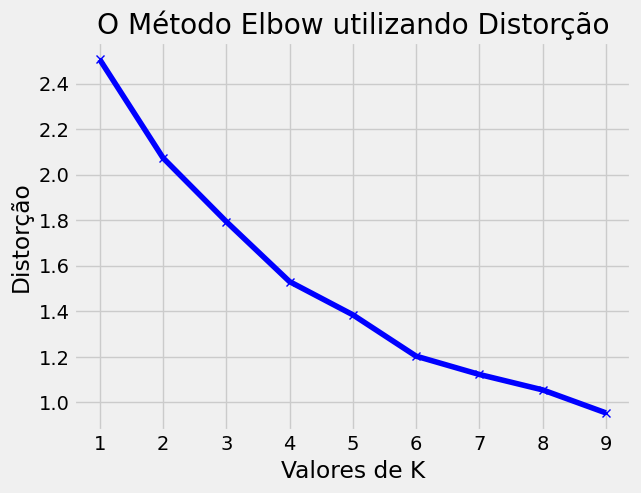

In [11]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Distorção')
plt.title('O Método Elbow utilizando Distorção')
plt.show()

In [12]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 2692.6390860792226
2 : 1611.9597173481031
3 : 1035.096854360122
4 : 770.1067013890183
5 : 586.3311939805288
6 : 462.5551815868911
7 : 386.05479462496606
8 : 320.61915699061365
9 : 264.4275598986328


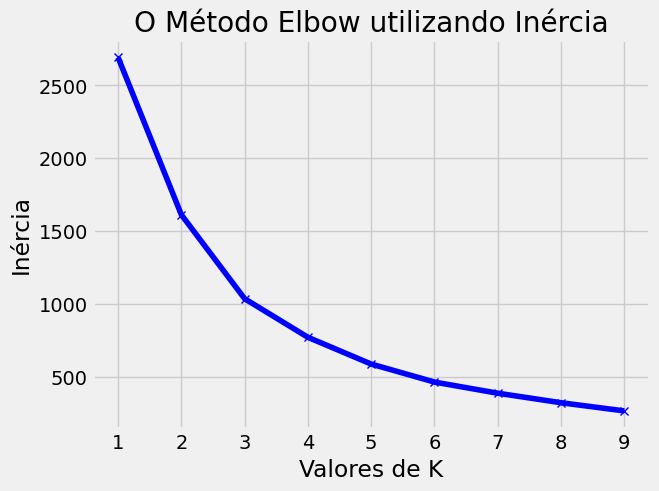

In [13]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Inércia')
plt.title('O Método Elbow utilizando Inércia')
plt.show()

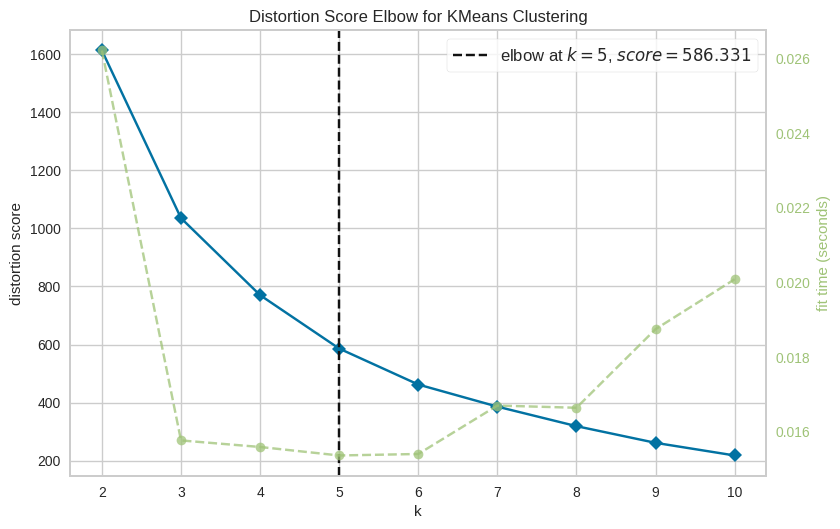

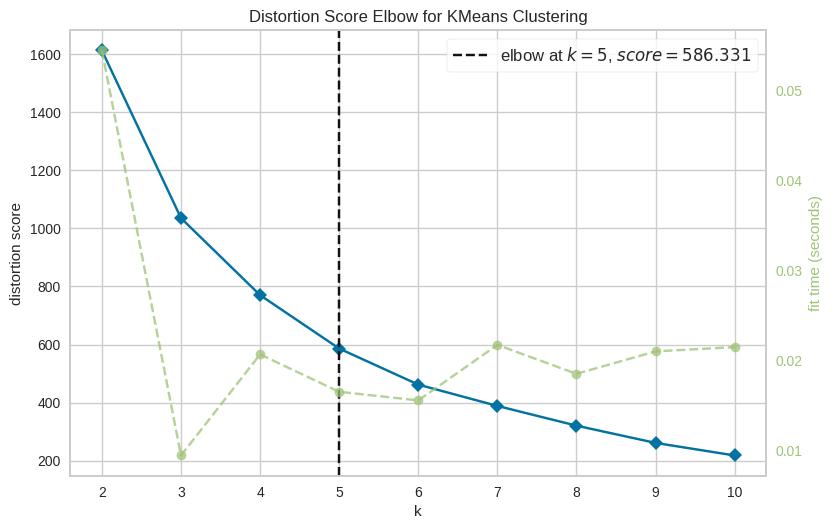

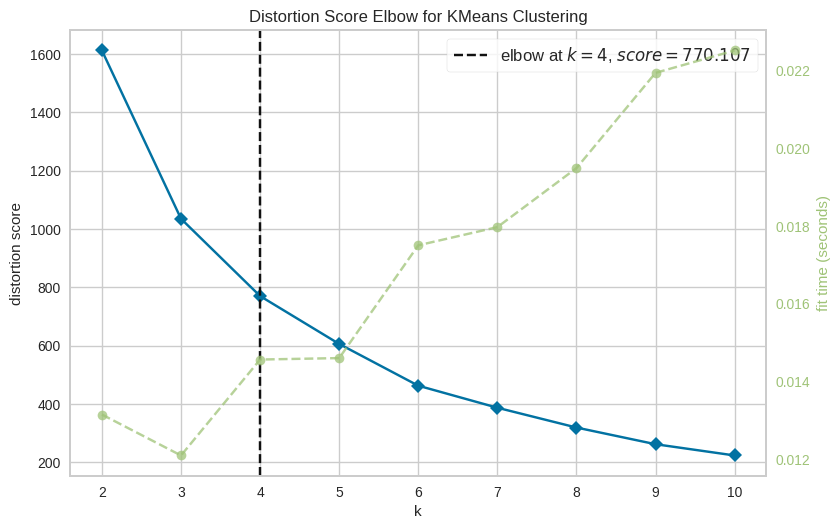

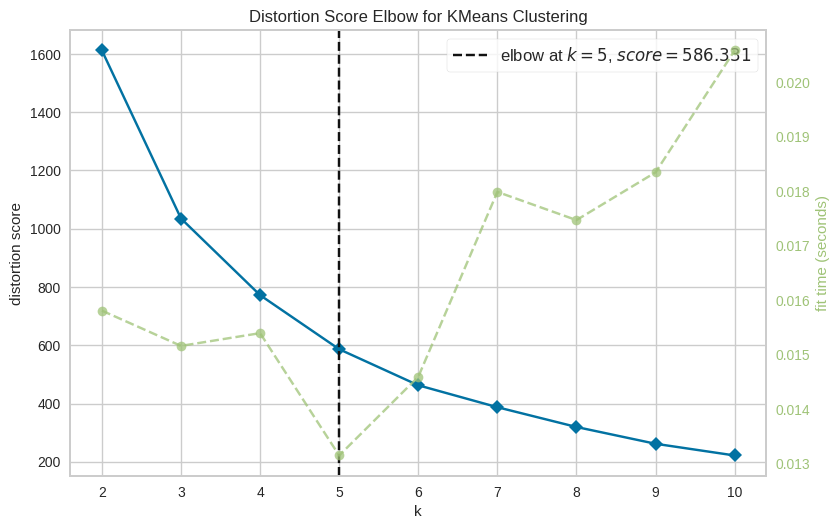

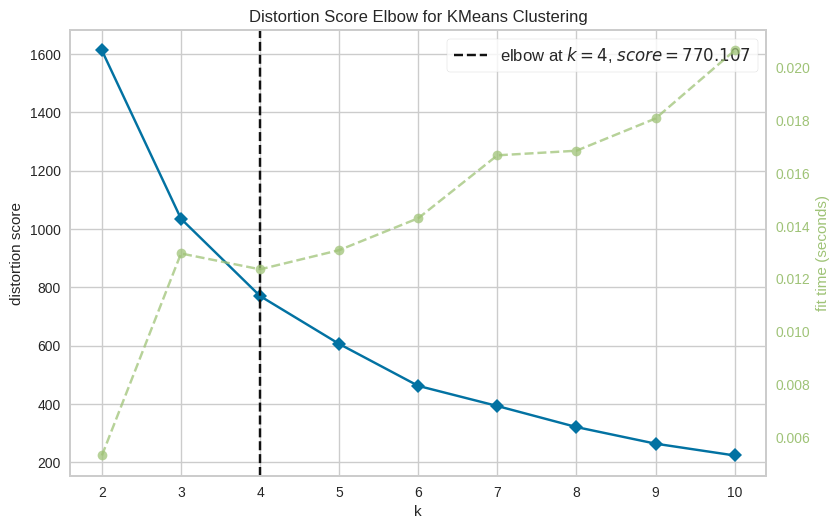

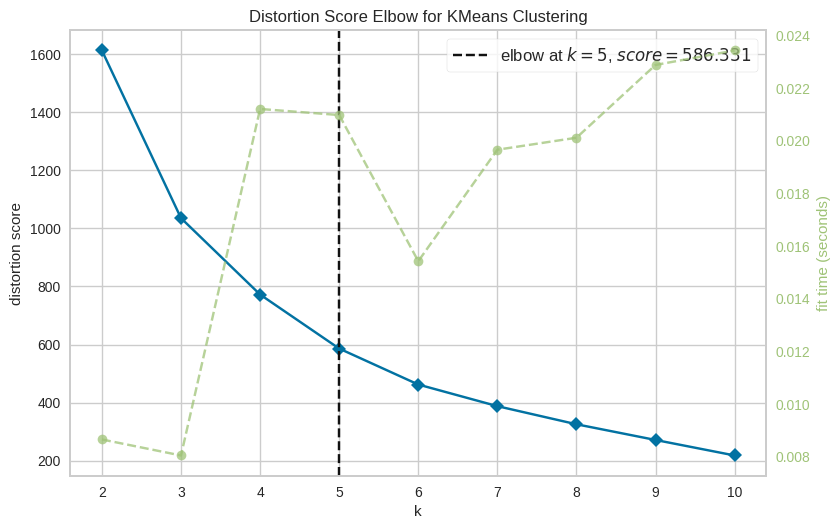

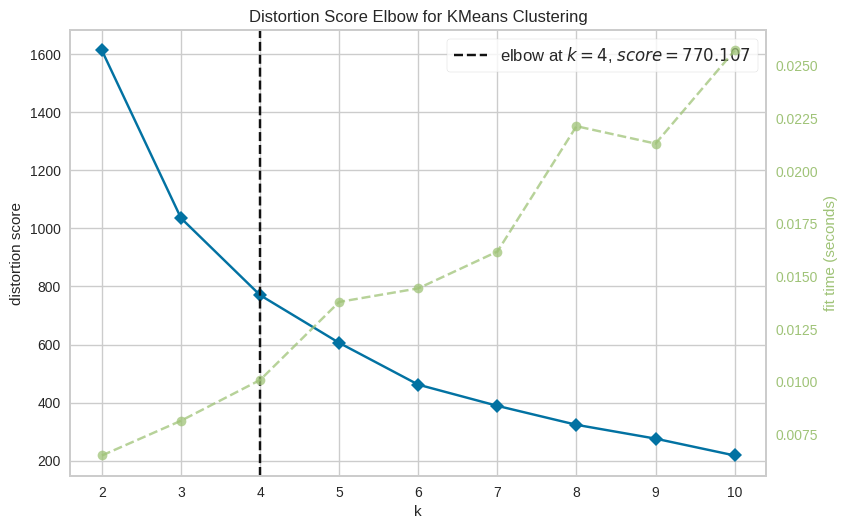

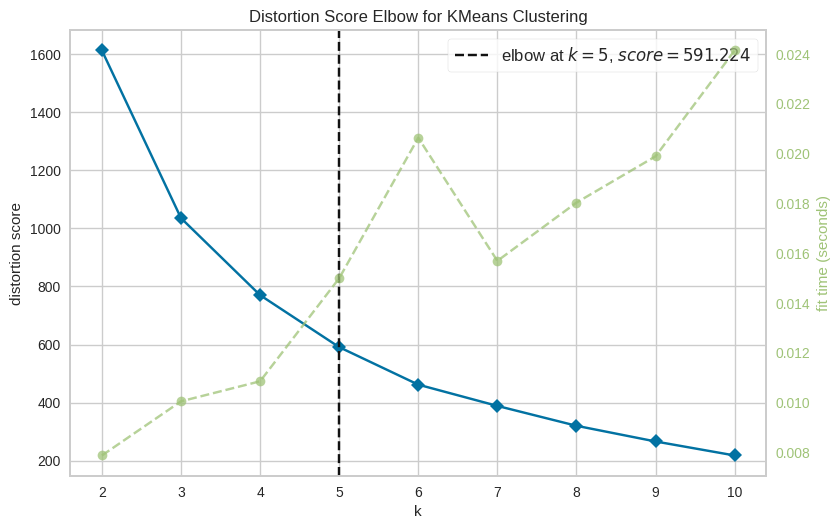

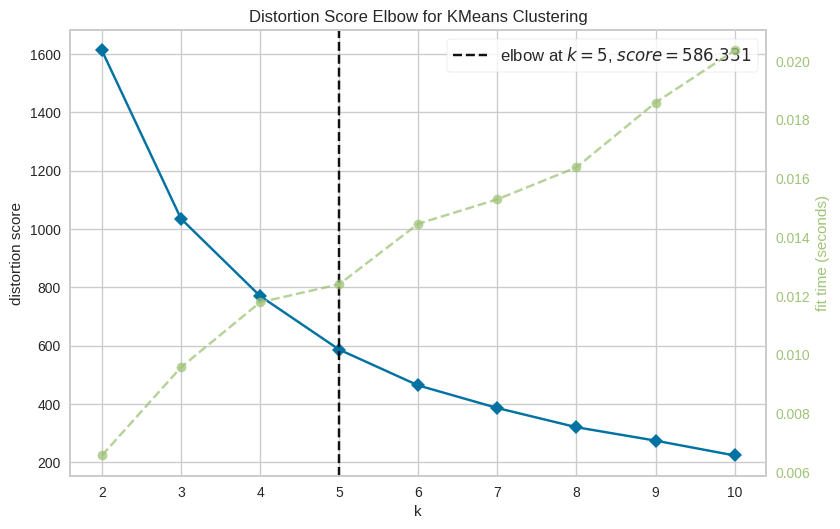

In [15]:
from yellowbrick.cluster import KElbowVisualizer

silModel = filtered_jul_dez_2020['PCA']
silModel = np.array((list(silModel)))
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(silModel)
    elb_visualizer = KElbowVisualizer(kmeanModel)
    elb_visualizer.fit(silModel)    
    elb_visualizer.show()  

## K = 5

[3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 2 3 0 0 0 3 2 2 3 3 2 2 2 0 0 3
 0 3 3 3 0 0 0 0 0 0 3 3 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 0
 3 3 3 3 3 3 4 3 0 3 3 3 0 0 0 3 3 3 0 3 3 3 3 3 0 3 3 3 3 3 0 0 0 0 0 3 4
 3 2 2 2 2 3 3 3 0 4 4 4 0 2 0 3 0 0 3 3 3 3 4 4 4 4 3 3 2 2 2 2 3 3 3 0 0
 0 0 3 3 3 3 0 3 4 4 3 3 3 3 0 0 0 3 4 4 0 0 0 0 1 3 3 0 0 0 0 0 1 1 1 1 1
 0 0 3 3 3 3 3 3 3 3 3 0 0 0 3 3 3 3 0 3 3 0 3 3 0 3 0 0 3 0 0 3 0 3 3 0 0
 0 3]


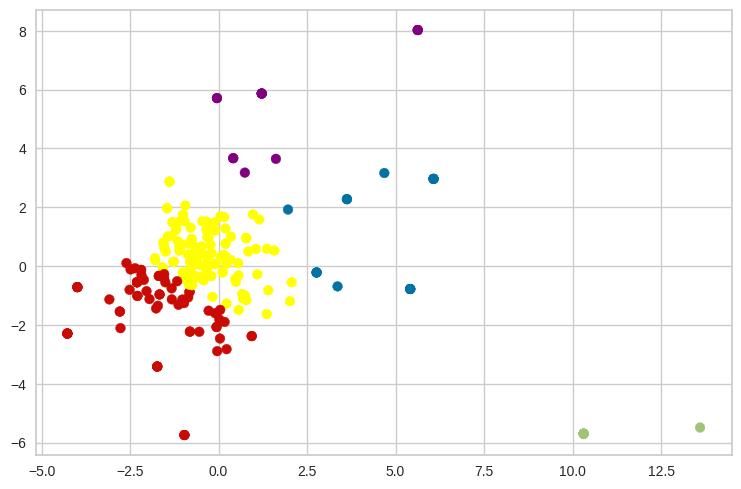

In [18]:
finalModel2 = filtered_jul_dez_2020['PCA']
finalModel2 = np.array((list(finalModel)))
finalModel2

kmeanModel2 = KMeans(n_clusters=5).fit(finalModel2)
kmeanModel2.fit(finalModel2)

print(kmeanModel2.labels_)


LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3: 'yellow', 4: 'purple'}
label_color = [LABEL_COLOR_MAP[l] for l in kmeanModel2.labels_]
plt.scatter(finalModel2[:,0], finalModel2[:,1], c=label_color)

In [19]:
kmeanModel2.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 0, 0, 0, 3, 2, 2, 3, 3, 2, 2, 2, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0,
       0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 4, 3, 0, 3, 3, 3, 0, 0,
       0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3,
       4, 3, 2, 2, 2, 2, 3, 3, 3, 0, 4, 4, 4, 0, 2, 0, 3, 0, 0, 3, 3, 3,
       3, 4, 4, 4, 4, 3, 3, 2, 2, 2, 2, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3,
       0, 3, 4, 4, 3, 3, 3, 3, 0, 0, 0, 3, 4, 4, 0, 0, 0, 0, 1, 3, 3, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3,
       0, 0, 0, 3], dtype=int32)

In [20]:
array2 = np.array((list(filtered_jul_dez_2020["title"])))
array2

array(["kiw que `` test posit '' par covid-19 é a prov que pandem é uma fars",
       'vacin contr covid-19 é vend por camelôs em madureir , no rio',
       'vacin contr covid-19 é vend por camelôs em madureir , no rio',
       'assoc american de médic ( ama ) lib hidroxicloroquin par tratament precoc contr covid-19',
       'prefeit de londr fing tom vacin contr covid-19 , mostr fot',
       'vacin contr covid-19 tev 112.800 relat de efeit colater , diz cdc',
       'vacin contr covid-19 infect pesso com hiv na austrál',
       'tiffany dov , enfermeir que desmai após tom vacin , morr',
       'enfermeir desmai gravement por caus de efeit da vacin contr covid-19',
       'stf proib vacin obrigatór par venezuelan a ped do psol em 2018',
       'coca-col que test posit par covid-19 mostr com test sã fals',
       'médic da bélgic está cert ao fal que vacin nã têm comprov , mud dna e control pesso pel 5g',
       '26 idos que tom vacin contr covid-19 no rein unid morr',
       'chines nã

In [21]:
pred_classes = kmeanModel2.predict(finalModel2)
pred_classes = list(pred_classes)

dictionaryPrime = dict(zip(filtered_jul_dez_2020["title"], pred_classes))
dictionaryPrime

{"kiw que `` test posit '' par covid-19 é a prov que pandem é uma fars": 3,
 'vacin contr covid-19 é vend por camelôs em madureir , no rio': 3,
 'assoc american de médic ( ama ) lib hidroxicloroquin par tratament precoc contr covid-19': 3,
 'prefeit de londr fing tom vacin contr covid-19 , mostr fot': 3,
 'vacin contr covid-19 tev 112.800 relat de efeit colater , diz cdc': 3,
 'vacin contr covid-19 infect pesso com hiv na austrál': 3,
 'tiffany dov , enfermeir que desmai após tom vacin , morr': 3,
 'enfermeir desmai gravement por caus de efeit da vacin contr covid-19': 3,
 'stf proib vacin obrigatór par venezuelan a ped do psol em 2018': 3,
 'coca-col que test posit par covid-19 mostr com test sã fals': 3,
 'médic da bélgic está cert ao fal que vacin nã têm comprov , mud dna e control pesso pel 5g': 2,
 '26 idos que tom vacin contr covid-19 no rein unid morr': 3,
 'chines nã usam másc em reuniã no institut butantan , no brasil': 3,
 'dor vai gast r $ 22 bilhõ com a vacin da chin par im

## Word Cloud for first cluster n = 0

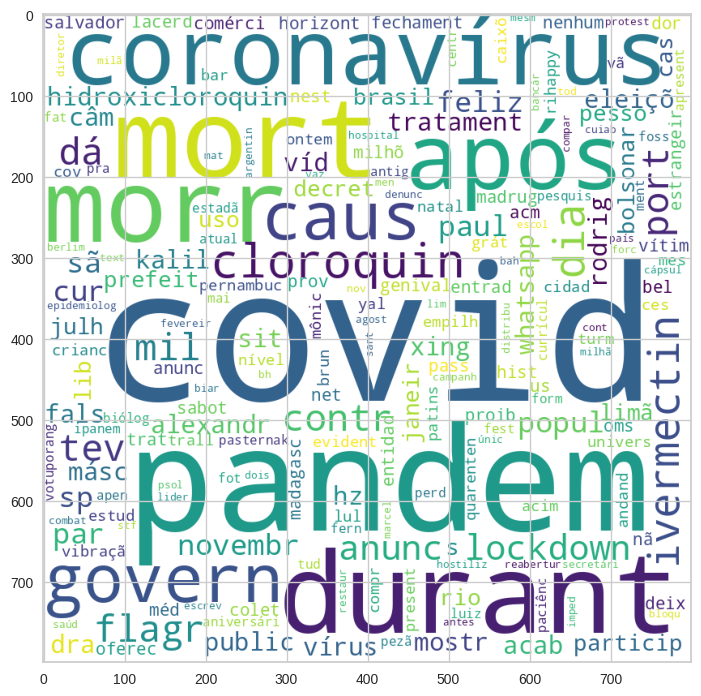

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

clusterOneWords = [k for k, v in dictionaryPrime.items() if v == 0]
custom_stop_words = ['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estão', 'você', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 'houveram', 'houvera', 'houvéramos', 'haja', 'hajamos', 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos', 'houverem', 'houverei', 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos', 'houveriam', 'sou', 'somos', 'são', 'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'fôramos', 'seja', 'sejamos', 'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'será', 'seremos', 'serão', 'seria', 'seríamos', 'seriam', 'tenho', 'tem', 'temos', 'tém', 'tinha', 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tivéramos', 'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver', 'tivermos', 'tiverem', 'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam']
unique_string=(" ").join(clusterOneWords)
wordCloudOne = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudOne)

## Word Cloud for second cluster n = 1

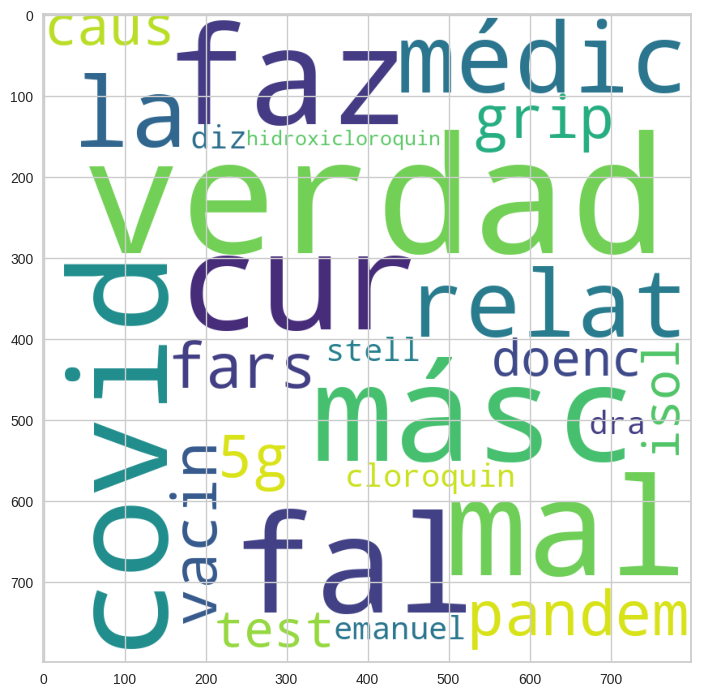

In [23]:
clusterTwoWords = [k for k, v in dictionaryPrime.items() if v == 1]
unique_string2=(" ").join(clusterTwoWords)
wordCloudTwo = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string2)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudTwo)

## Word Cloud for third cluster n = 2

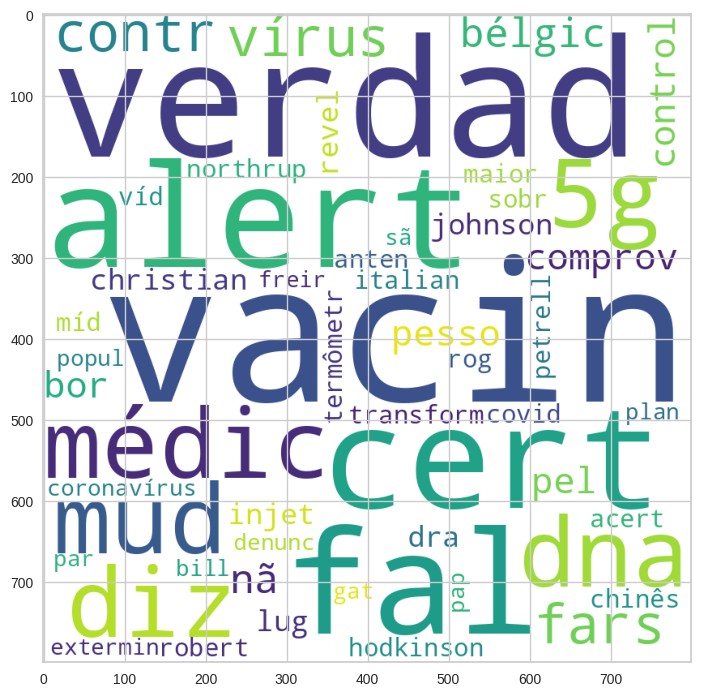

In [24]:
clusterThreeWords = [k for k, v in dictionaryPrime.items() if v == 2]

unique_string3=(" ").join(clusterThreeWords)

wordCloudThree = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string3)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudThree)

## Word Cloud for fourth cluster n = 3

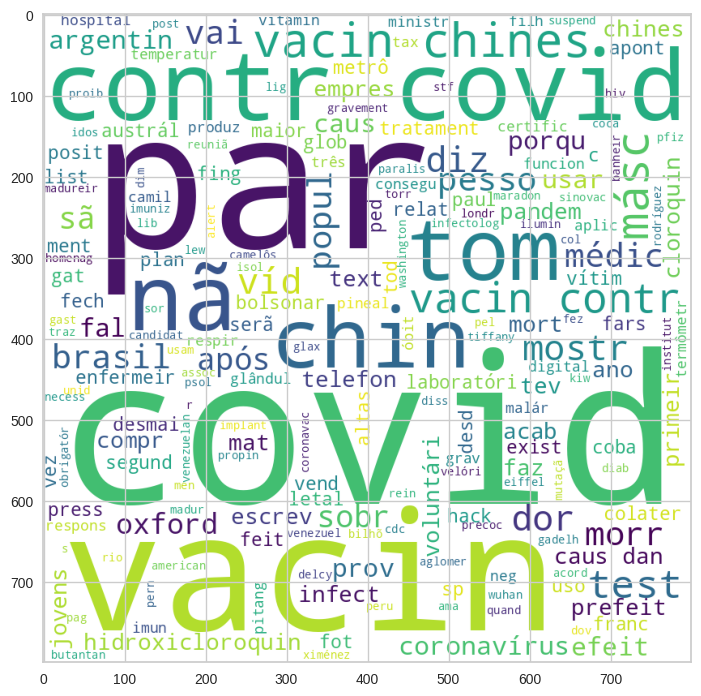

In [25]:
clusterFourWords = [k for k, v in dictionaryPrime.items() if v == 3]

unique_string4=(" ").join(clusterFourWords)

wordCloudFour = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string4)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudFour)

## Word Cloud for fourth cluster n = 4

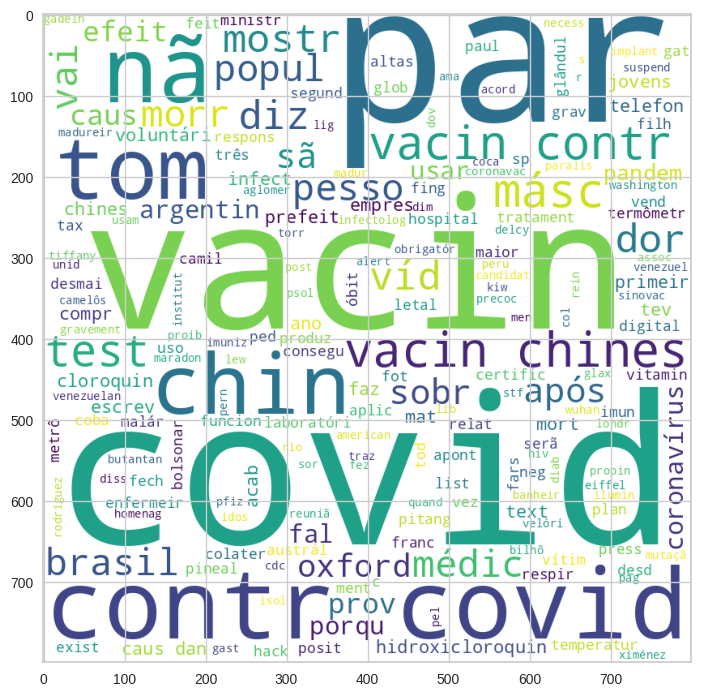

In [26]:
clusterFiveWords = [k for k, v in dictionaryPrime.items() if v == 3]

unique_string5=(" ").join(clusterFiveWords)

wordCloudFive = WordCloud(width = 800, height = 800, background_color ='white',
                         stopwords = custom_stop_words, min_font_size = 10).generate(unique_string5)
plt.figure(figsize=(15,8))
plt.imshow(wordCloudFive)